# UC San Diego: Neural Data Science
## Exploring Resting-State EEG Data of Psychiatric Conditions

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Eric Silberman
- Olimpia Carrioli

# Overview

**Data preprocessing:** Compute descriptive statistics of each group of subjects to analyze the dataset composition (mean, standard deviation, sex, mean age, mean years of education, mean IQ). Check for missing data, to be removed if not impacting the distribution, and imputed otherwise. 

**Initial Graphs:** \
1.Brain plot of eeg AB (power) columns per disorder, per wave length \
2.Electrode vs Electrode Heatmap of functional connectivity between each pair of electrode \
3.One plot per disorder - distribution of AB values where one line represents one wave length 
   
**EDA:** Plot relevant distribution of values for each sub group to identify potential confounding variables (eg. distribution of age for healthy controls and all other psychiatric conditions. If the distributions differ significantly, age can be a confounding factor).

**Dimensionality reduction:** Perform dimensionality reduction through Principal Component Analysis. This will transform the data to a lower-dimensional space where each principal component (linear combination of original features) is independent of each other. Plot PCA-transformed data.

**Clustering Analysis:** Cluster the training data using the following algorithms: Gaussian Mixture Model, K-Means, Hierarchical clustering. Perform hyperparameter tuning on validation set using metrics such as accuracy and silhouette score. Test the models on the test set.

**Interpretation:** Visualize the results and interpret them to reject or fail to reject the null hypothesis. 


<a id='research_question'></a>
# Research Question

Do patients with the following psychiatric conditions: Depression, Personality disorders, Anxiety disorders, Schizophrenia, Eating disorders, and Addictive behaviors differ in their brain activation patterns as measured by resting-state EEG? 

<a id='background'></a>

## Background & Prior Work

**Papers:** \
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6333694/ \
https://www.nature.com/articles/s41598-021-00975-3 \
https://psycnet.apa.org/record/2023-52266-001  \
https://www.sciencedirect.com/science/article/pii/S0010440X24000142

The motivation behind researching differences in resting state EEG data of patients labeled with various psychiatric conditions stems from the desire to better understand the pathophysiological traits of these disorders. The mental health conditions that we aim to study being depression, personality disorders, anxiety disorders, schizophrenia, eating disorders, and addictive behaviors are known to be complex problems where identifying distinct patterns could have significant positive implications for diagnosis, treatment, and understanding how the brain works. Electroencephalogram (EEG) is a tool that can be used to study these psychiatric conditions. 

In our project, we utilize a resting-state EEG dataset which is a non-invasive method used to examine neural activity in the brain, providing insights to brain activity patterns across psychiatric conditions. Recent advancements in EEG-based Default Mode Network(DMN) analysis served as a useful tool for understanding brain networks in psychiatric disorders. (Choi, KM., Kim, JY., Kim, YW. et al.). Harnessing EEG data not only opened the gate to the identification of patterns within specific disorders, but also enabled the bigger picture of identifying patterns across multiple disorders(Newson, J. J., & Thiagarajan, T. C.).

To accomplish the pattern matching, recent studies incorporate clustering techniques. With this, patients are able to be differentiated into distinct subgroups which could even be used to predict which patients were a greater risk of suicide(Eun Namgung et al.). Using a technique such as clustering peaked our interest in what results we could perhaps encounter.



# Hypothesis


Do patients with the following psychiatric conditions: Depression, Personality disorders, Anxiety disorders, Schizophrenia, Eating disorders, and Addictive behaviors differ in their brain activation patterns as measured by resting-state EEG? 

# Dataset


- Dataset Name: EEG machine learning
- Link to the dataset: https://osf.io/d7ye5
- Number of observations: 945

Identifying Psychiatric Disorders Using Machine-Learning (Dataset) - article: Identification of Major Psychiatric Disorders From Resting-State Electroencephalography Using a Machine Learning Approach

# Data Wrangling

* Explain steps taken to pull the data you need into Python.

In [158]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne
from math import ceil
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [159]:
# Load the data
df_eeg=pd.read_csv('EEG.machinelearing_data_BRMH.csv')

In [160]:
# display first five rows of the data
df_eeg.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [161]:
# display the shape of the data
df_eeg.shape

(945, 1149)

In [162]:
# print columns of the data
df_eeg.columns

Index(['no.', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main.disorder',
       'specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1149)

# Data Cleaning

## Steps
1. Drop non-eeg columns
2. Check for missing values, in case drop (if a small number )  or fill in with median value (if a substantial number)
3. Count how many observations per main disorder
4. Balance dataset by random sample n=95 subjects for the following disorders: Mood disorder, Addictive disorder, Trauma disorder, Schizophrenia, Anxiety disorder, Healthy controls
5. Standardize 

In [163]:
# drop non-eeg columns, including specific disorder 
cols_to_drop = ['sex', 'age', 'eeg.date', 'education', 'IQ', 'specific.disorder', 'Unnamed: 122']
df = df_eeg.copy().drop(cols_to_drop, axis=1)
df.head()

,no.,main.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,Addictive disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,Addictive disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,Addictive disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,Addictive disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,Addictive disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [164]:
print(f'Shape of the dataset after column drop: {df.shape}')

Shape of the dataset after column drop: (945, 1142)


In [165]:
# check for missing values
print(f'Total number of missing entries: {df.isnull().sum().sum()}')

missing_values = df.isnull().sum()
for column, missing in missing_values.items():
    if missing > 0:
        print(f'{column}: {missing}')

Total number of missing entries: 0


In [166]:
# Count observations per each main disorder category

count_observations = pd.DataFrame(df['main.disorder'].value_counts())
count_observations

,count
main.disorder,
Mood disorder,266
Addictive disorder,186
Trauma and stress related disorder,128
Schizophrenia,117
Anxiety disorder,107
Healthy control,95
Obsessive compulsive disorder,46


The dataset has an uneven number of subjects in each class. To deal with this issue, we will consider only the first 6 classes and take a random sample of n=95 subjects for each class.

In [167]:
# filter out the main disorders with less than 100 observations
main_disorders = count_observations[count_observations['count'] > 90].index
df = df[df['main.disorder'].isin(main_disorders)]
print(f'Shape of the dataset after filtering: {df.shape}')
df['main.disorder'].value_counts()

Shape of the dataset after filtering: (899, 1142)


main.disorder
Mood disorder                         266
Addictive disorder                    186
Trauma and stress related disorder    128
Schizophrenia                         117
Anxiety disorder                      107
Healthy control                        95
Name: count, dtype: int64

In [168]:
df_balanced = pd.DataFrame()

# Sample 95 observations from each main disorder category
for disorder in df['main.disorder'].unique():  # assuming the original DataFrame is named df_original
    df_disorder = df[df['main.disorder'] == disorder].sample(n=95, random_state=42)
    df_balanced = pd.concat([df_balanced, df_disorder])

# Reset index after sampling
df_balanced.reset_index(drop=True, inplace=True)

# Verify the value counts to ensure balanced sampling
df_balanced['main.disorder'].value_counts()

main.disorder
Addictive disorder                    95
Trauma and stress related disorder    95
Mood disorder                         95
Healthy control                       95
Schizophrenia                         95
Anxiety disorder                      95
Name: count, dtype: int64

In [169]:
# reassign the balanced dataset to the original variable
df = df_balanced.copy()
df

,no.,main.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,235,Addictive disorder,26.181641,25.902261,26.664358,34.829474,36.889649,38.672188,30.430113,13.506323,...,55.600905,52.570750,63.352329,56.718679,50.730215,43.232550,48.923926,39.651438,62.660650,55.193196
1,671,Addictive disorder,12.894573,12.524952,10.726235,13.045767,12.021049,12.332389,9.674158,6.629876,...,79.142092,51.164307,56.541607,66.237559,69.000918,34.915975,62.855194,22.351374,61.772871,52.980003
2,701,Addictive disorder,14.858509,17.498095,15.850800,18.136284,11.568558,10.327930,8.898444,8.278926,...,31.269648,24.529650,27.351248,30.039540,26.089779,21.288413,29.408857,18.697619,38.576392,27.381354
3,223,Addictive disorder,18.966170,13.249483,15.239921,16.239829,16.819111,16.363107,12.552514,7.992722,...,99.479882,80.372879,46.158822,54.256562,80.347025,45.707857,54.397059,24.644979,47.661938,26.569090
4,222,Addictive disorder,35.618340,34.313329,41.399099,39.378744,42.854091,31.684276,21.415486,26.871182,...,69.578036,57.246753,62.152032,77.871425,50.777767,42.693878,63.704894,41.454382,68.578085,59.904167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,289,Anxiety disorder,19.687536,21.053213,16.062682,17.960994,19.669073,20.735947,39.870280,18.926313,...,91.104357,85.677061,88.763916,90.520212,94.218564,85.530729,96.995840,81.415802,95.386338,88.653172
566,631,Anxiety disorder,32.164541,44.899597,34.618223,16.327979,16.660957,15.863549,14.416161,10.853981,...,78.647712,50.638545,51.475143,63.246118,63.919254,45.056550,69.394346,31.119935,64.587881,63.514408
567,435,Anxiety disorder,19.155081,24.719108,14.974233,22.902192,26.060467,28.229891,18.778986,9.433571,...,72.186027,55.735052,64.585986,65.800419,66.156789,49.770687,63.401059,46.428500,68.733952,68.672137
568,290,Anxiety disorder,12.549356,13.895915,8.543582,12.342167,13.963302,13.573024,11.864435,4.095711,...,49.285031,23.564508,45.825768,24.679314,30.220416,31.273286,33.456138,17.919454,23.784628,22.933867


# Data Visualization

* This is a good place for some relevant visualizations related to any exploratory data anlayses (EDA) you did after the basic cleaning.
https://www.kaggle.com/code/lazygene/visualising-pre-processed-eeg-data


## Planned Graphs
1. Brain plot of eeg AB (power) columns per disorder, per wave length
2. Electrode vs Electrode Heatmap of functional connectivity between each pair of electrode
3. One plot per disorder - distribution of AB values where one line represents one wave length


### Graph #1 - Brain plot

- First Step: Electrode Positions
    - This will be used to visualize a region based on the the electrode placement. 
- Second Step: All Bands for each Main Disorder
    - Pre-process: Get Main Disorders and the respective mean eeg AB (power) 
    - Format: (XXX) rows x 6 columns(delta, theta, alpha, beta, high beta, gamma)
- Third Step: Create Visualization 
    - Create a function to print the graphs out.
  
### Graph #2 - Function Connectivity Heat Map
 - ROI vs ROI: COH data column. 

### Graph #3 - Distribution of Mean Absolute Power of wave types by main disorder
- First Step: Filter Columns
    - Filer columns to include only absolute power values. These are columns starting with AB
- Second Step: Define columns for each wave types
    - Create a dictionary with keys the columns of the dataframe, and values which type of wave the column is recording. {'AB.A.delta.a.FP1': 'delta', 'AB.A.delta.b.FP2': 'delta'}
- Third Step: Calculate means
    - Define a function to calculate the mean for each wave type across electrodes
- Fourth Step: Plot
    - Iterate over the main disorders
    - Define a dataframe containing information for the given disorder only
    - Calculate the mean for each wave type across electrodes 
    - Plot the kernel density of all the wave types for the current disorder on one plot

# GRAPH 1 - Brain Plot

In [170]:
chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()
channels

,0,1
FP1,-0.030,0.080
FP2,0.030,0.080
F7,-0.073,0.047
F3,-0.040,0.041
Fz,0.000,0.038
F4,0.040,0.041
F8,0.073,0.047
T3,-0.085,0.000
C3,-0.045,0.000
Cz,0.000,0.000


In [171]:
# make_dig_montage accepts only 3D coordinates
for key in chs.keys():
    chs[key]+=[0]
chs

{'FP1': [-0.03, 0.08, 0],
 'FP2': [0.03, 0.08, 0],
 'F7': [-0.073, 0.047, 0],
 'F3': [-0.04, 0.041, 0],
 'Fz': [0, 0.038, 0],
 'F4': [0.04, 0.041, 0],
 'F8': [0.073, 0.047, 0],
 'T3': [-0.085, 0, 0],
 'C3': [-0.045, 0, 0],
 'Cz': [0, 0, 0],
 'C4': [0.045, 0, 0],
 'T4': [0.085, 0, 0],
 'T5': [-0.073, -0.047, 0],
 'P3': [-0.04, -0.041, 0],
 'Pz': [0, -0.038, 0],
 'P4': [0.04, -0.041, 0],
 'T6': [0.07, -0.047, 0],
 'O1': [-0.03, -0.08, 0],
 'O2': [0.03, -0.08, 0]}

In [172]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vmin=None, vmax=None, **kwargs):
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
        
    # Combine vmin and vmax into vlim for compatibility
    vlim = (vmin, vmax)
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names, vlim=vlim,
                                  cmap=cmap, mask=mask, mask_params=marker_style, show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

In [173]:
df_eeg2=pd.read_csv('EEG.machinelearing_data_BRMH.csv')
df_eeg2

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,M,22.0,2014.8.28,13.0,116.0,Healthy control,Healthy control,41.851823,36.771496,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,942,M,26.0,2014.9.19,13.0,118.0,Healthy control,Healthy control,18.986856,19.401387,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,943,M,26.0,2014.9.27,16.0,113.0,Healthy control,Healthy control,28.781317,32.369230,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,944,M,24.0,2014.9.20,13.0,107.0,Healthy control,Healthy control,19.929100,25.196375,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [174]:
# One of the columns contains no data, it separates data
# patient info | abs power of PSD per band per channel | sep_col | functional connectivity data
mis = df_eeg2.isna().sum()
sep_col = mis[mis == df_eeg2.shape[0]].index[0]
df_eeg2 = df_eeg2.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)
df_eeg2

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,Healthy control,Healthy control,41.851823,36.771496,43.671792,36.860889,24.732236,23.607823,23.288260,7.520642,...,1.966436,1.763397,1.285942,2.437923,2.130979,1.727413,1.710518,2.574734,2.533354,5.596057
941,Healthy control,Healthy control,18.986856,19.401387,27.586436,20.194732,19.407491,20.216570,16.465027,13.178851,...,2.701922,2.685138,2.648595,2.559590,3.054965,3.163359,3.247100,2.646515,3.385173,3.085049
942,Healthy control,Healthy control,28.781317,32.369230,11.717778,23.134370,26.209302,25.484497,22.586688,11.368466,...,3.258838,2.434620,1.501337,0.840513,1.733498,1.610465,1.644675,1.216763,1.614421,1.164097
943,Healthy control,Healthy control,19.929100,25.196375,14.445391,16.453456,16.590649,16.007279,18.909188,13.438102,...,1.849005,1.678465,3.655796,1.429330,3.151128,1.630643,1.888551,1.447402,1.819110,1.302056


In [175]:
def reformat_name(name):
    '''
    reformat from XX.X.band.x.channel to band.channel
    '''
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'

reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df_eeg2.columns[:2],
                              reformat_vect(df_eeg2.columns[2:])))

# Assign the new column names to df_eeg2.columns directly
df_eeg2.columns = new_colnames

In [176]:

non_numeric_cols = df_eeg2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

for col in df_eeg2.columns[2:]:
    df_eeg2[col] = pd.to_numeric(df_eeg2[col], errors='coerce')

main_mean = df_eeg2.groupby('main.disorder').mean(numeric_only=True).reset_index()
# mean powers per main disorder
# list of bands
bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
# convert from wide to long
main_mean = pd.wide_to_long(main_mean, bands, ['main.disorder'], 'channel', sep='.', suffix='\w+')
main_mean

Non-numeric columns: Index(['main.disorder', 'specific.disorder'], dtype='object')


,,delta,theta,alpha,beta,highbeta,gamma
main.disorder,channel,,,,,,
Addictive disorder,FP1,18.831516,13.836983,24.308169,10.588020,2.041568,2.418517
Anxiety disorder,FP1,20.212546,12.220164,20.542989,11.369194,2.362892,2.874982
Healthy control,FP1,18.383673,11.877841,21.024037,9.197048,2.055055,2.577345
Mood disorder,FP1,20.652163,13.594064,23.575915,12.357410,2.629678,3.292514
Obsessive compulsive disorder,FP1,18.261254,12.469764,24.380553,9.946188,2.199657,3.096013
...,...,...,...,...,...,...,...
Healthy control,O2,9.597102,7.218941,20.192476,10.277784,1.955759,2.990976
Mood disorder,O2,13.887099,9.051129,28.289462,13.643925,2.554539,3.615276
Obsessive compulsive disorder,O2,11.490165,9.438324,31.925618,11.461414,2.151135,3.304698


In [177]:
def plot_eeg_dataset(dataset, channels, gwidth=2, gheight=1.5, wspace=0,
                     marker_style={'markersize': 2, 'markerfacecolor': 'black'},
                     band_ordered=None, conditions_ordered=None, band_labels=None,
                     condition_labels=None, **kwargs):
    if band_ordered is None:
        band_ordered = dataset.columns
    if conditions_ordered is None:
        conditions_ordered = dataset.index.get_level_values(0).unique()
    if band_labels is None:
        band_labels = band_ordered
    if condition_labels is None:
        condition_labels = conditions_ordered
    # number of rows in figure
    nrows = len(band_ordered)
    # number of columns in figure
    ncols = len(conditions_ordered)
    # create figure with width gwidth and gheight per graph
    fig = plt.figure(constrained_layout=True, figsize=(gwidth*ncols, gheight*nrows))
    # create subfigures
    subfigs = fig.subfigures(nrows, ncols, wspace=wspace)
    # loop through subfigures
    for ind, subfig in np.ndenumerate(subfigs):
        i, j = ind
        # select band (column name in main_mean)
        band = band_ordered[i]
        # select disorder (row name in main_mean)
        disorder = conditions_ordered[j]
        # select band levels for disorder
        levels = dataset.loc[disorder, band]
        # calculate maximum (vmax) for easier comparison between disorders
        vmax = ceil(max(dataset[band]))
        # create axes
        ax = subfig.subplots()
        # plot eeg
        plot_eeg(levels, channels.to_numpy(), ax, subfig, vmin=0, vmax=vmax, marker_style=marker_style, **kwargs)
        # annotate band (if needed)
        if j == 0:
            ax.set_ylabel(band_labels[i])

        # annotate disorder (if needed)
        if i == 0:
            subfig.suptitle(condition_labels[j], y=1.3)
    return fig, subfigs

<iframe src="https://www.kaggle.com/embed/lazygene/visualising-pre-processed-eeg-data?cellIds=5&kernelSessionId=106172334" height="600" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Visualising pre-processed EEG data"></iframe>

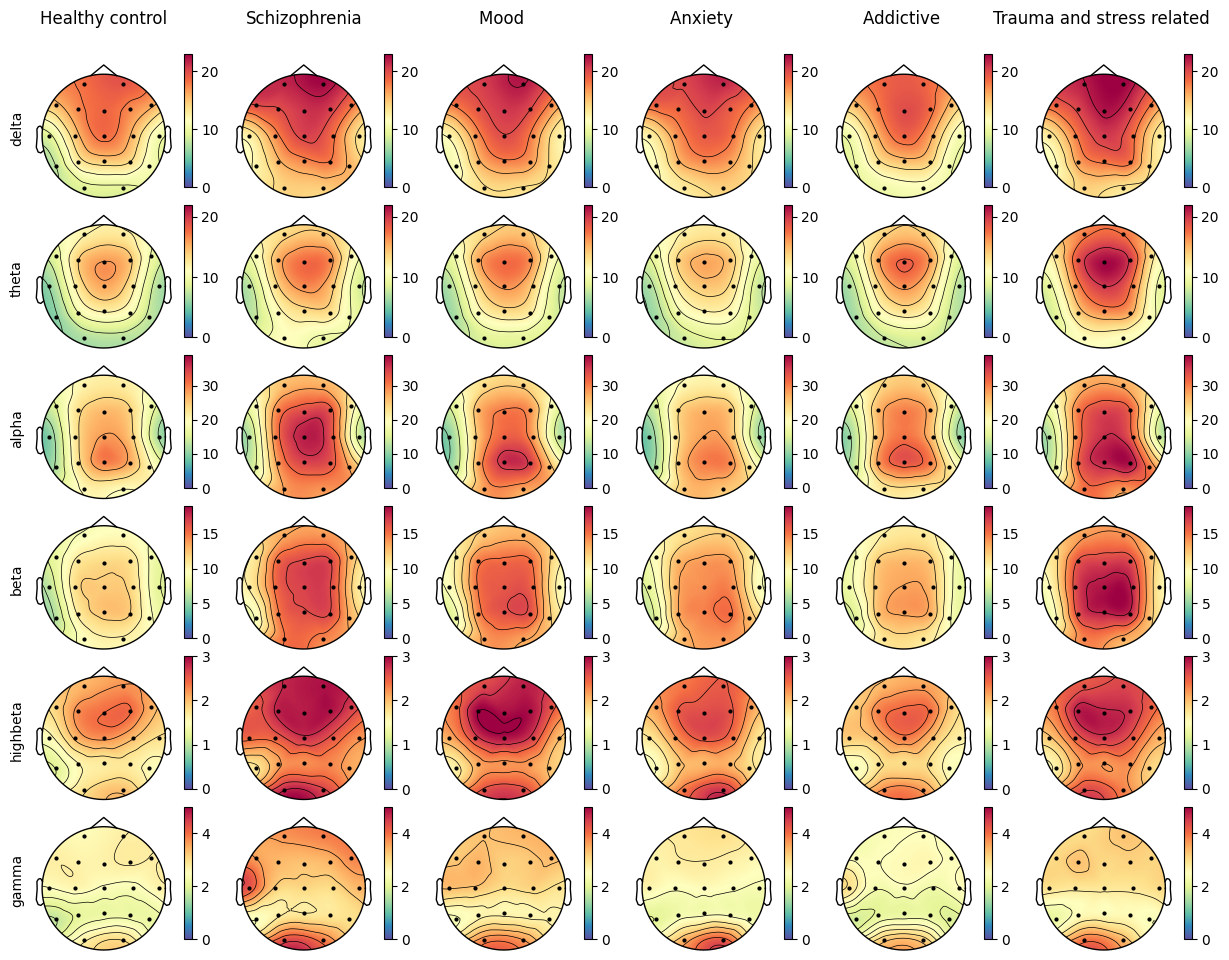

In [178]:
# order conditions (main.disorder)
conds = ['Healthy control',
         'Schizophrenia', 
         'Mood disorder', 
         'Anxiety disorder',  
         #'Obsessive compulsive disorder', 
         'Addictive disorder',
         'Trauma and stress related disorder']
conds_labs = [x.replace('disorder', '') for x in conds]
plot_eeg_dataset(main_mean, channels, conditions_ordered=conds, condition_labels=conds_labs)
plt.show()

## Interpretation
For the most part, the control seeems pretty relaxed with not that much activation, and 3 of them seem to be highly correlated(Schizophrenia,Mood,Trauma and Stress related). These 3 seem to have the most activation as well. The activation areas are around the frontal and around the middle.

# GRAPH 2 - Connectivity Map

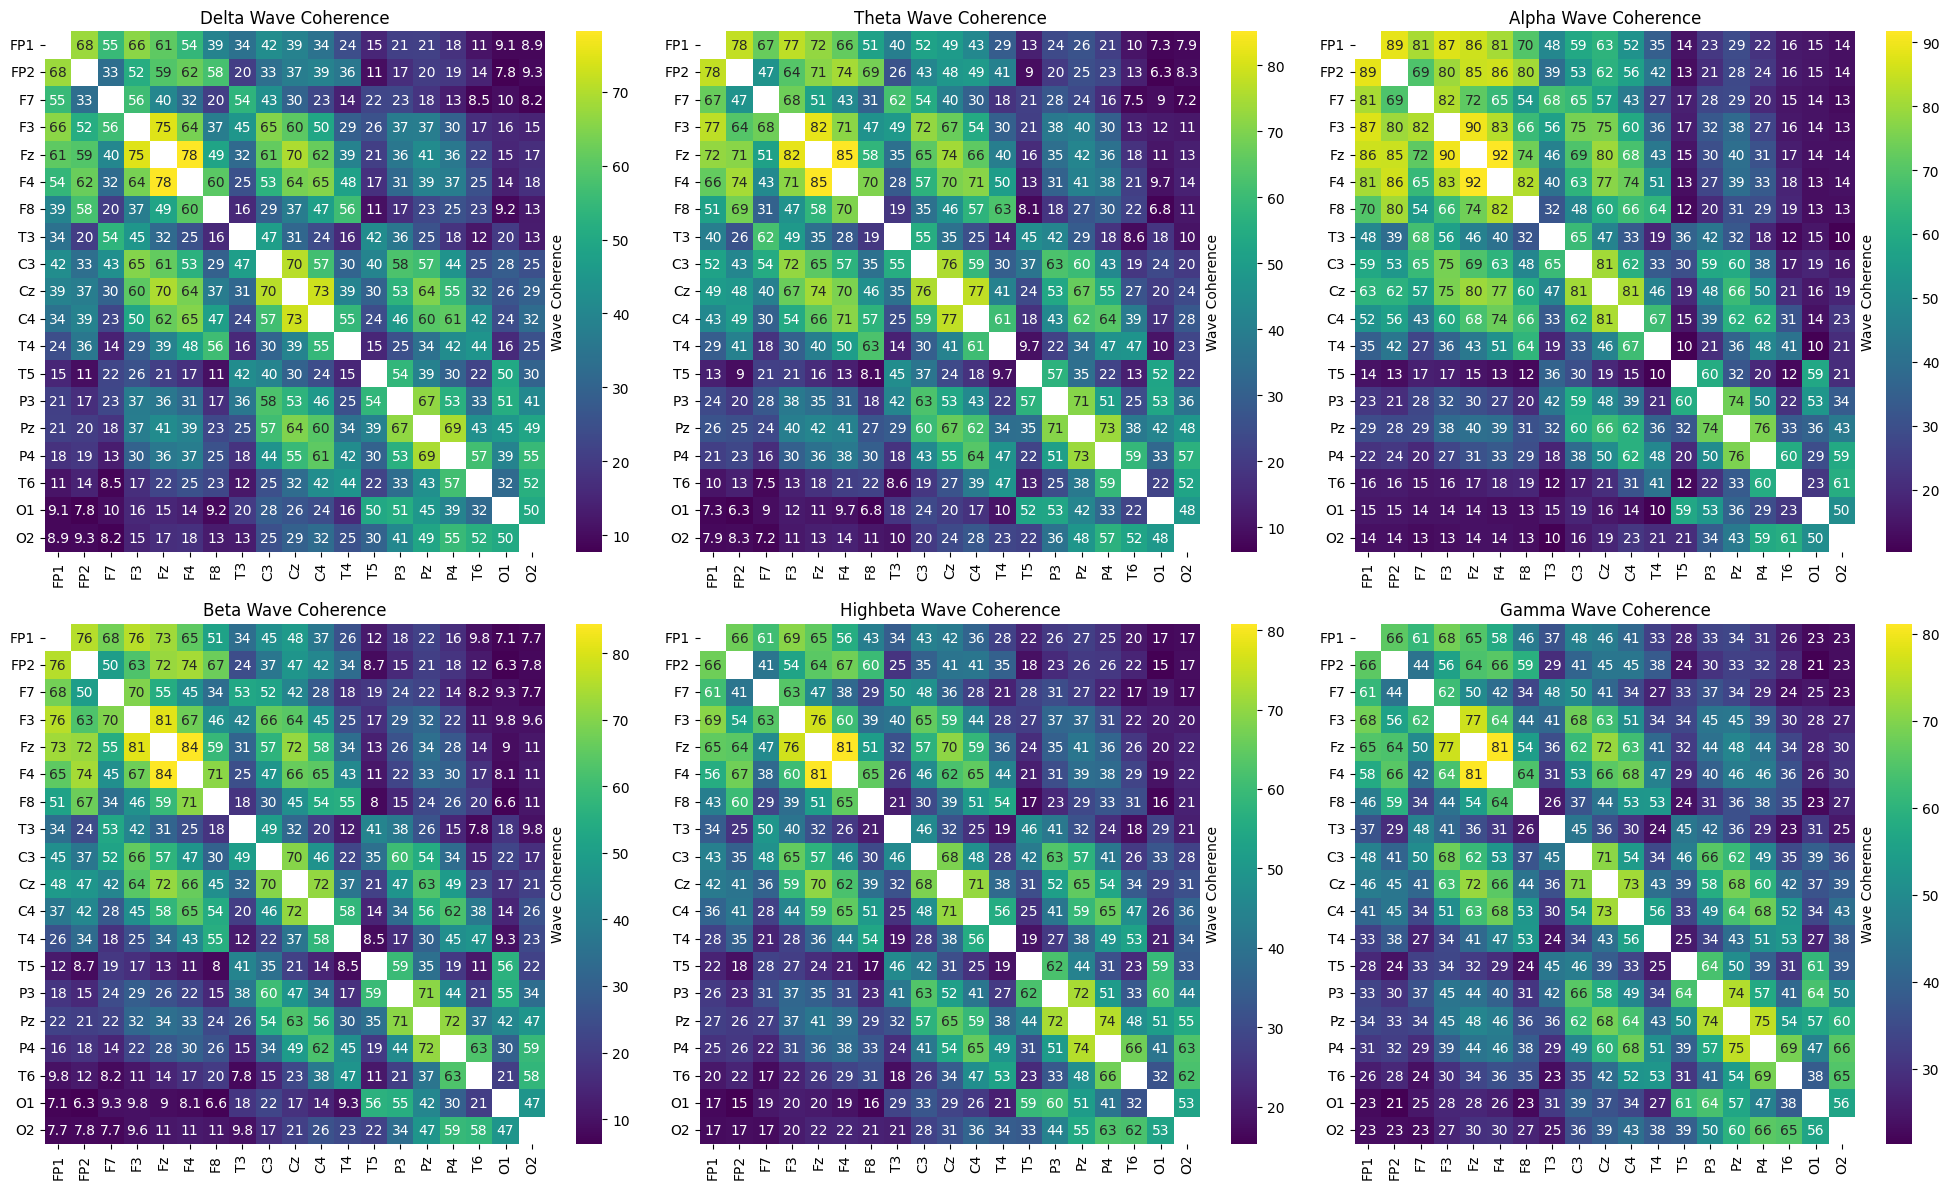

In [179]:

df_graph2 = df
df_graph2.head()
#Keep Only the Connectivity Columns
df_graph2 = df_graph2.filter(like='COH')
df_graph2.head()

#Test: 
# List of channels
channels = [
    'FP1', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 
    'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2'
]
# List of wave types
wave_types = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']

# Function to plot coherence matrix for a given wave type
def plot_wave_coherence(df, wave_type, channels, ax):
    # Initialize an empty DataFrame for the coherence matrix
    coh_matrix = pd.DataFrame(np.nan, index=channels, columns=channels)

    # Filter columns for the given wave type
    wave_columns = [col for col in df.columns if f'.{wave_type}.' in col]

    # Populate the coherence matrix
    for col in wave_columns:
        parts = col.split('.')
        if len(parts) == 7:
            region1 = parts[4]
            region2 = parts[6]
            mean_coherence = df[col].mean()  # Use the mean value directly from df
            coh_matrix.loc[region1, region2] = mean_coherence
            coh_matrix.loc[region2, region1] = mean_coherence  # Ensure symmetry

    # Plot the heatmap
    sns.heatmap(coh_matrix, annot=True, cmap='viridis', xticklabels=channels, yticklabels=channels, ax=ax)
    ax.set_title(f'{wave_type.capitalize()} Wave Coherence')
    ax.yaxis.set_label_position("right")
    ax.set_ylabel('Wave Coherence')

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Plot each wave type's coherence matrix
for wave_type, ax in zip(wave_types, axes.flat):
    plot_wave_coherence(df, wave_type, channels, ax)

plt.tight_layout()
plt.show()

## Interpretation
Very similar around all the different waves types. The areas with the highest coherence seem to be frontal region.

# GRAPH 3 - Distribution of Mean Absolute Power of wave types by main disorder

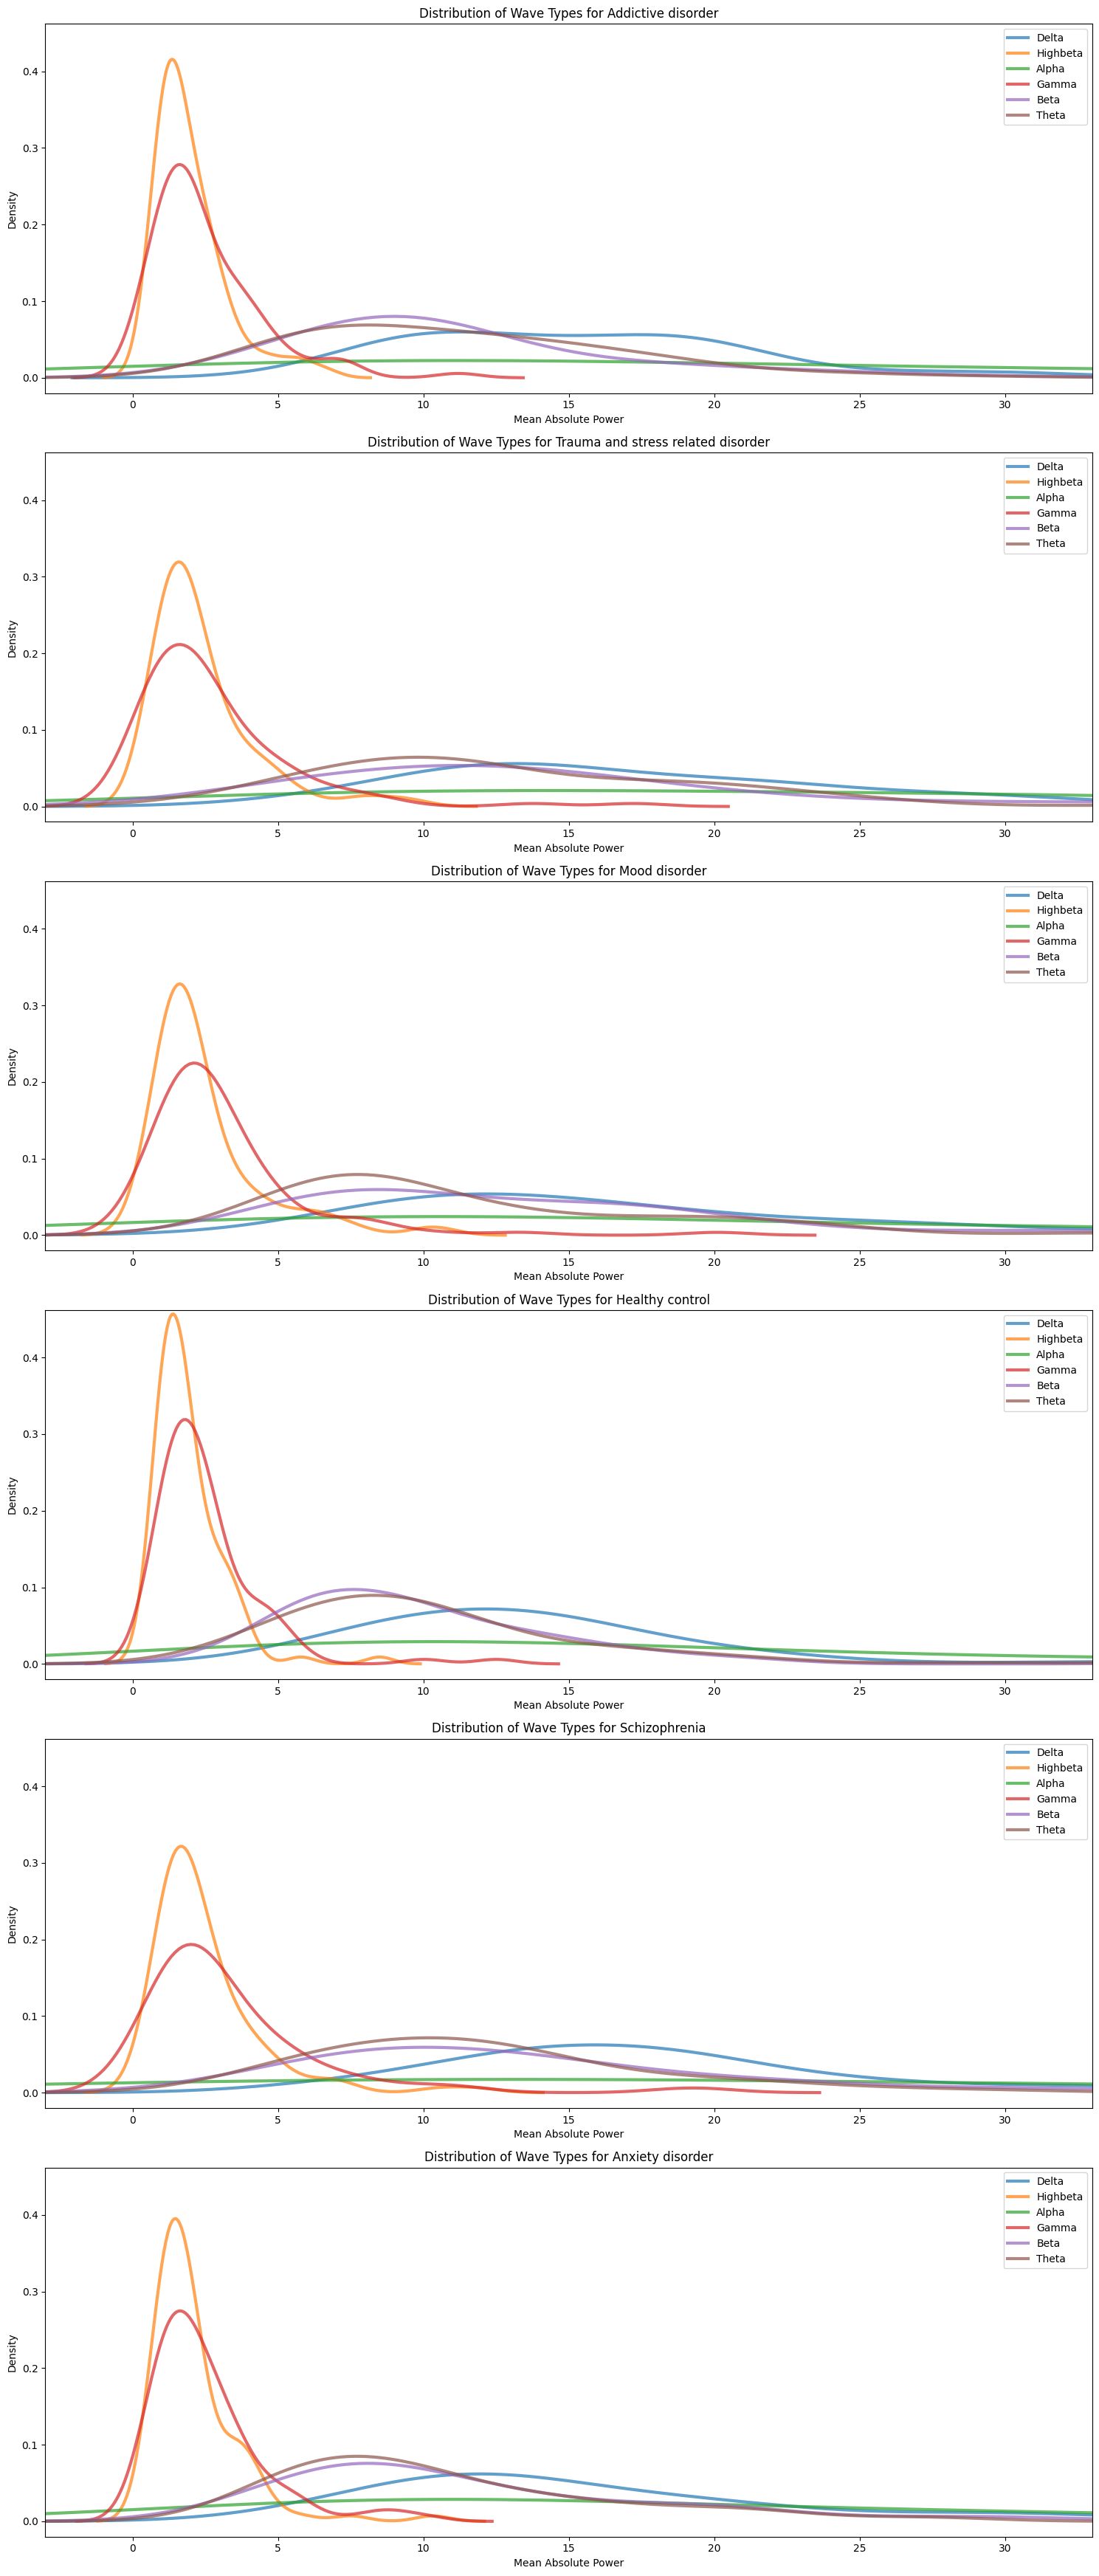

In [180]:
# Filter columns that start with "AB"
ab_columns = [col for col in df.columns if col.startswith('AB')]

# define wave types
def get_wave_type(col_name):
    parts = col_name.split('.')
    return parts[2] if len(parts) > 2 else 'unknown'
wave_types = {col: get_wave_type(col) for col in ab_columns}
# Plotting function
def calculate_mean(df):
    wave_summaries = {}
    for wave_type in set(wave_types.values()):
        cols_to_plot = [col for col, wave in wave_types.items() if wave == wave_type]
        if cols_to_plot:
            wave_summaries[wave_type] = df[cols_to_plot].mean(axis=1)
    return wave_summaries

fig, axes = plt.subplots(6, 1, figsize=(15, 35))
# Iterate over each main.disorder
for i, disorder in enumerate(df['main.disorder'].unique()):
    df_disorder = df[df['main.disorder'] == disorder]
    wave_summaries = calculate_mean(df_disorder)
    
    for wave_type, values in wave_summaries.items():
        sns.kdeplot(values, label=wave_type.capitalize(), fill=False, alpha=0.7, ax=axes[i], linewidth=3)
    axes[i].set_xlim(-3, 33)  
    axes[i].set_ylim(-0.02, 0.462)
    axes[i].set_title(f'Distribution of Wave Types for {disorder}')
    axes[i].set_xlabel('Mean Absolute Power')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Interpretation 
For the most part, all the different conditions seem to have very similar graphs.

# Data Analysis & Results

## Step 1: PCA for dimensionality reduction

In [181]:
# Apply PCA to functional connectivity data and absolute power to reduce dimensionality and engineer new features

def apply_pca(df, n_components=12):
    '''
    Applies PCA to the functional connectivity (COH) data and absolute power (AB) data and returns a DataFrame with the PCA components
    df: DataFrame, input data
    n_components: int, number of components to keep

    return: pca, pca_df
    pca: PCA object, the fitted PCA object
    pca_df: DataFrame, DataFrame with the PCA components
    '''
    # Filter out the non-numeric columns
    numeric_cols = df.select_dtypes(include=['float64']).columns
    df_numeric = df[numeric_cols]

    # Standardize the data using z scores
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numeric)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(df_scaled)
    
    # Create a DataFrame with the PCA components
    pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['main.disorder'] = df['main.disorder'].values
    
    return pca, pca_df


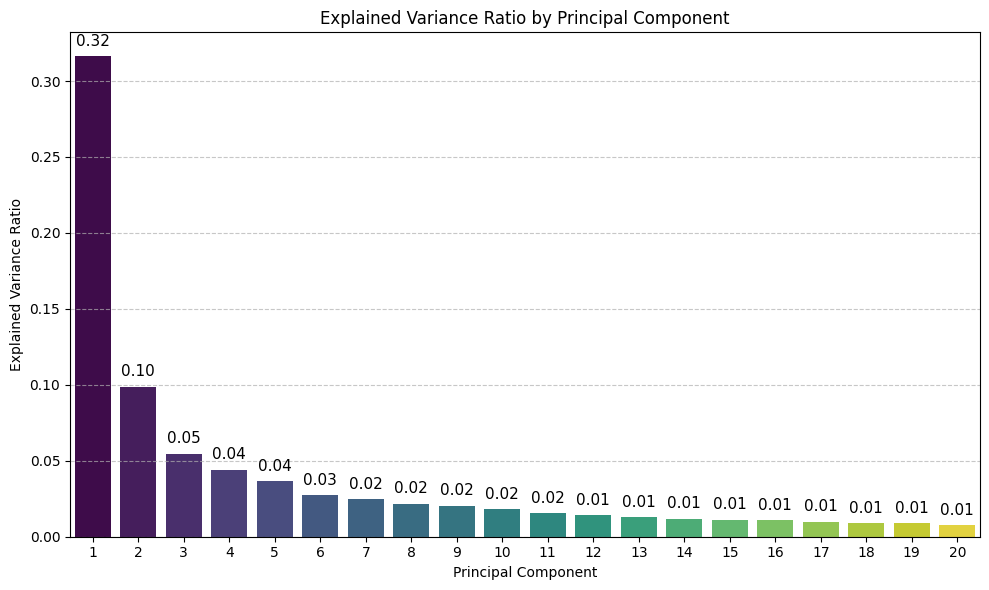

In [182]:
# visualize the explained variance ratio
pca, pca_df = apply_pca(df, n_components=20)

explained_variance_df = pd.DataFrame({
    'Principal Component': np.arange(1, pca.n_components_ + 1),
    'Explained Variance Ratio': pca.explained_variance_ratio_
})

plt.figure(figsize=(10, 6))

sns.barplot(data=explained_variance_df, x='Principal Component', y='Explained Variance Ratio', hue='Principal Component', palette='viridis', dodge=False, legend=False)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of the bars
for i, ratio in enumerate(pca.explained_variance_ratio_):
    plt.text(i, ratio + 0.005, f'{ratio:.2f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

The cumulative variance explained by the first 12 PCs is 70%, so 12 is a reasonable number of principal components to consider for our analysis. 

## Step 2: Clustering on PCA reduced data

K-means on PCA-Reduced Data

Adjusted Rand Index (ARI): 0.01
Normalized Mutual Information (NMI): 0.02
Adjusted Mutual Information (AMI): 0.01


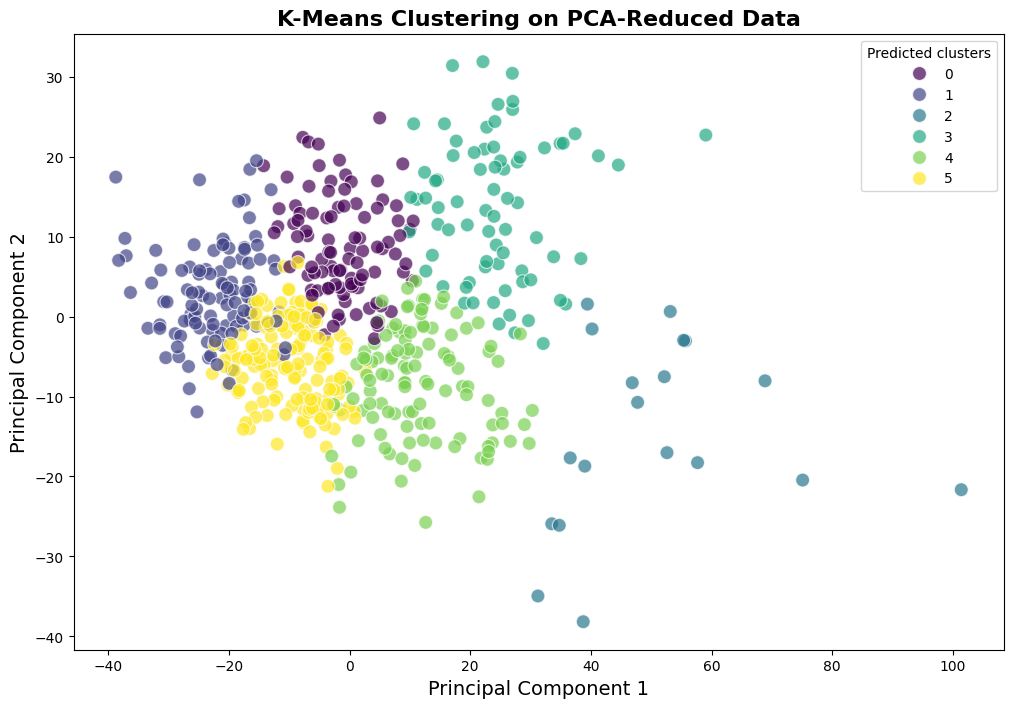

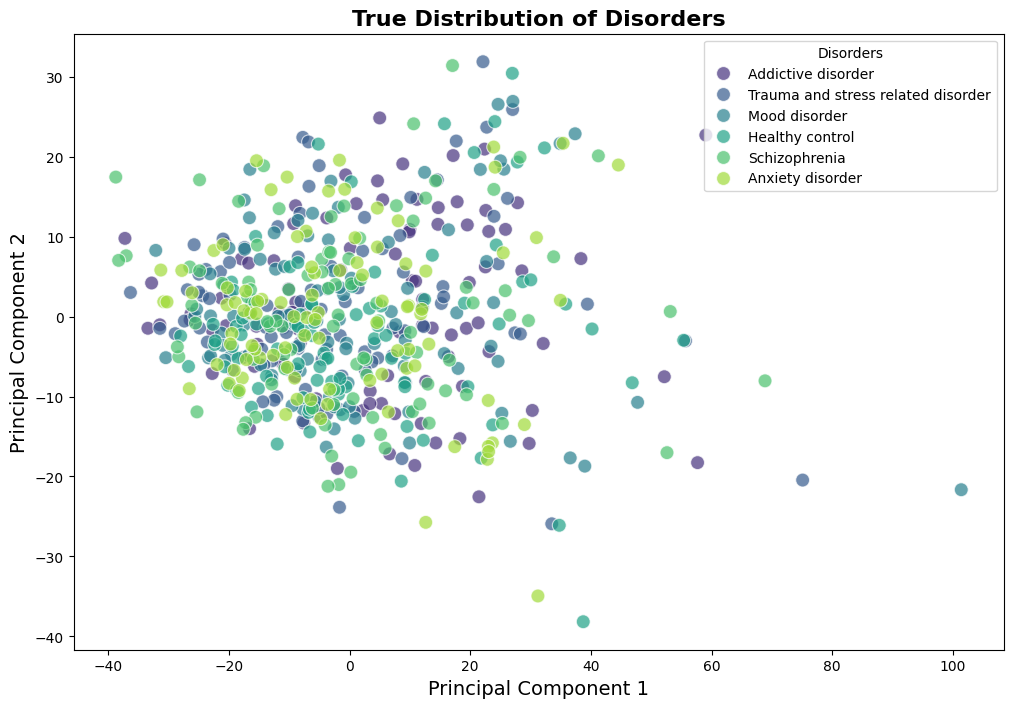

In [183]:
# Apply PCA, n components = 12 
pca, pca_df = apply_pca(df, n_components=12)
pca_df.drop('main.disorder', axis=1, inplace=True)

# apply KMeans clustering
kmeans = KMeans(n_clusters=len(df['main.disorder'].unique()), random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add cluster labels to the PCA DataFrame to assess the goodness of clustering
pca_df['Cluster'] = clusters
pca_df['Disorder'] = df['main.disorder'].values

# Assess the clustering quality using ARI, NMI, and AMI
ari = adjusted_rand_score(pca_df['Disorder'], pca_df['Cluster'])
nmi = normalized_mutual_info_score(pca_df['Disorder'], pca_df['Cluster'])
ami = adjusted_mutual_info_score(pca_df['Disorder'], pca_df['Cluster'])

print(f'Adjusted Rand Index (ARI): {ari:.2f}')
print(f'Normalized Mutual Information (NMI): {nmi:.2f}')
print(f'Adjusted Mutual Information (AMI): {ami:.2f}')

# Plot clustered data 
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering on PCA-Reduced Data', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Predicted clusters', loc ='upper right')
plt.show()

# Plot true labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Disorder', palette='viridis', s=100, alpha=0.7)
plt.title('True Distribution of Disorders', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Disorders', loc ='upper right')
plt.show()


Try Gaussian Mixture Model on PCA reduced data

Adjusted Rand Index (ARI): -0.00
Normalized Mutual Information (NMI): 0.01
Adjusted Mutual Information (AMI): -0.00


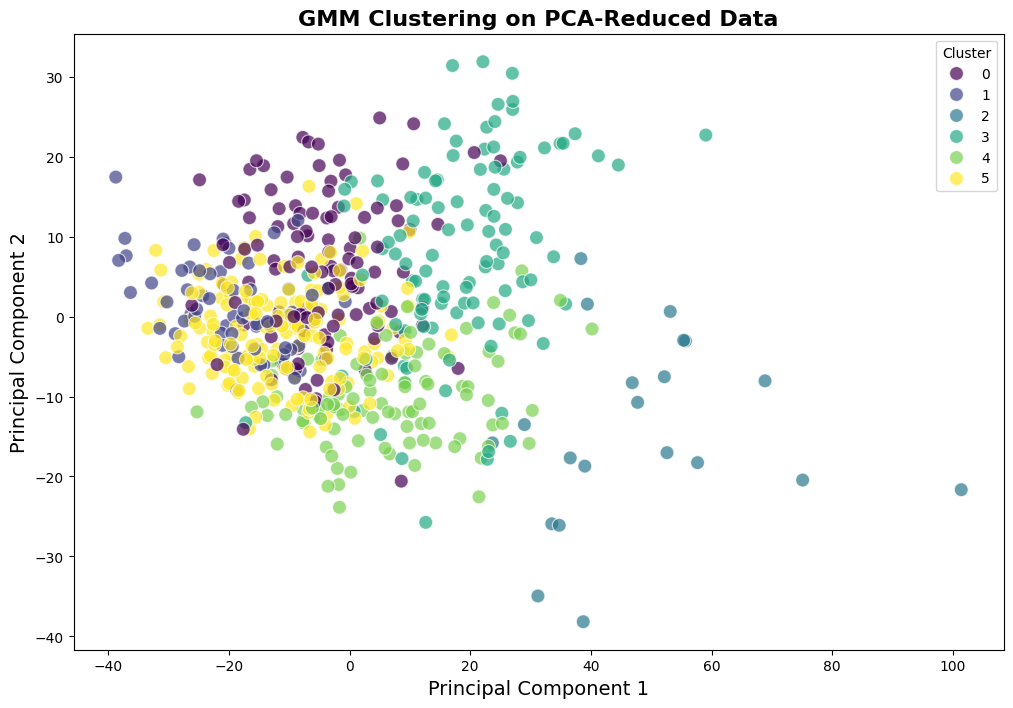

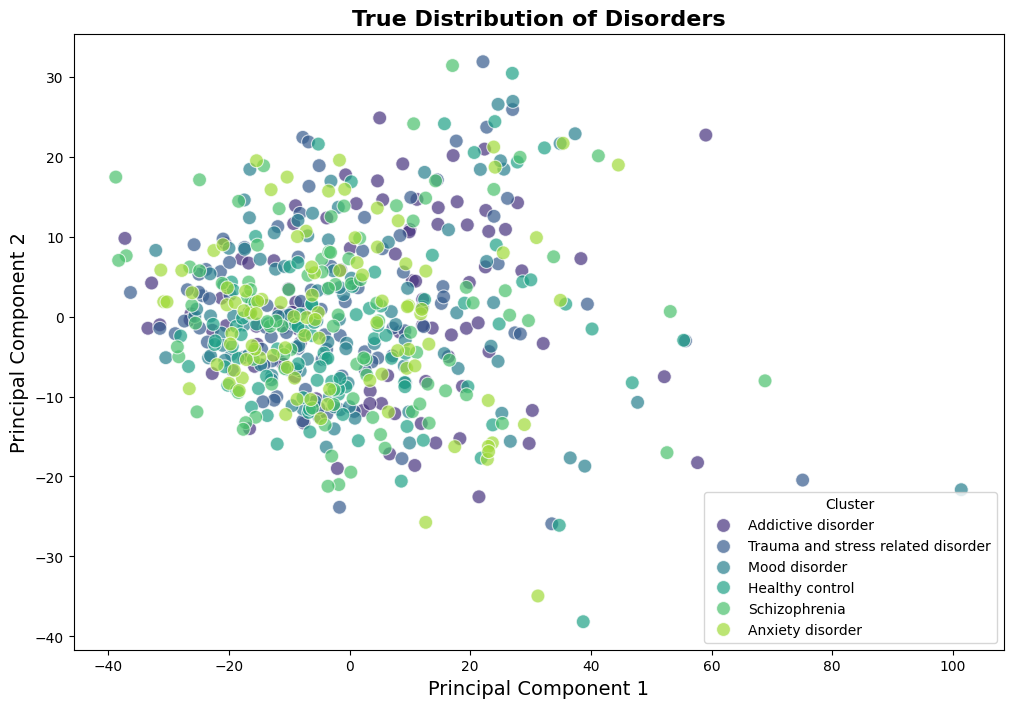

In [184]:
pca, pca_df = apply_pca(df, n_components=12)
pca_df.drop('main.disorder', axis=1, inplace=True)

gmm = GaussianMixture(n_components=len(df['main.disorder'].unique()), random_state=42)
clusters = gmm.fit_predict(pca_df)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters
pca_df['Disorder'] = df['main.disorder'].values

# Step 3: Assess the clustering quality using ARI, NMI, and AMI
ari = adjusted_rand_score(pca_df['Disorder'], pca_df['Cluster'])
nmi = normalized_mutual_info_score(pca_df['Disorder'], pca_df['Cluster'])
ami = adjusted_mutual_info_score(pca_df['Disorder'], pca_df['Cluster'])

print(f'Adjusted Rand Index (ARI): {ari:.2f}')
print(f'Normalized Mutual Information (NMI): {nmi:.2f}')
print(f'Adjusted Mutual Information (AMI): {ami:.2f}')

# Visualize the clustering results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('GMM Clustering on PCA-Reduced Data', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster')
plt.show()

# Visualize the true labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Disorder', palette='viridis', s=100, alpha=0.7)
plt.title('True Distribution of Disorders', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster')
plt.show()

## Clustering on full dataset: K-Means and Gaussian Mixture Model

In [185]:
# Separate features and target variable
X = df.drop('main.disorder', axis=1)
y = df['main.disorder']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=len(df['main.disorder'].unique()), random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled_df)

# Apply GMM clustering
gmm = GaussianMixture(n_components=len(df['main.disorder'].unique()), random_state=42)
clusters_gmm = gmm.fit_predict(X_scaled_df)

# Add cluster labels to the DataFrame to assess the goodness of clustering
X_scaled_df['Cluster_kmeans'] = clusters_kmeans
X_scaled_df['Cluster_gmm'] = clusters_gmm
X_scaled_df['Disorder'] = y.values

# Assess the clustering quality using ARI, NMI, and AMI
ari_k = adjusted_rand_score(X_scaled_df['Disorder'], X_scaled_df['Cluster_kmeans'])
nmi_k = normalized_mutual_info_score(X_scaled_df['Disorder'], X_scaled_df['Cluster_kmeans'])
ami_k = adjusted_mutual_info_score(X_scaled_df['Disorder'], X_scaled_df['Cluster_kmeans'])

ari_g = adjusted_rand_score(X_scaled_df['Disorder'], X_scaled_df['Cluster_gmm'])
nmi_g = normalized_mutual_info_score(X_scaled_df['Disorder'], X_scaled_df['Cluster_gmm'])
ami_g = adjusted_mutual_info_score(X_scaled_df['Disorder'], X_scaled_df['Cluster_gmm'])

print('KMeans Clustering on Full Data:')
print(f'Adjusted Rand Index (ARI): {ari_k:.2f}')
print(f'Normalized Mutual Information (NMI): {nmi_k:.2f}')
print(f'Adjusted Mutual Information (AMI): {ami_k:.2f}\n')

print('GMM Clustering on Full Data:')
print(f'Adjusted Rand Index (ARI): {ari_g:.2f}')
print(f'Normalized Mutual Information (NMI): {nmi_g:.2f}')
print(f'Adjusted Mutual Information (AMI): {ami_g:.2f}')

KMeans Clustering on Full Data:
Adjusted Rand Index (ARI): 0.00
Normalized Mutual Information (NMI): 0.02
Adjusted Mutual Information (AMI): 0.00

GMM Clustering on Full Data:
Adjusted Rand Index (ARI): 0.00
Normalized Mutual Information (NMI): 0.02
Adjusted Mutual Information (AMI): 0.00


## Step 3: Supervised Learning Classification with Support Vector Machine on Entire Dataset

Validation Accuracy: 0.2806410256410256
Best hyperparameters: {'C': 10, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM model: SVC(C=10, random_state=42)
Testing Accuracy: 0.21
                                    precision    recall  f1-score   support

                Addictive disorder       0.26      0.29      0.27        28
                  Anxiety disorder       0.13      0.14      0.14        28
                   Healthy control       0.41      0.45      0.43        29
                     Mood disorder       0.14      0.17      0.16        29
                     Schizophrenia       0.21      0.17      0.19        29
Trauma and stress related disorder       0.06      0.04      0.04        28

                          accuracy                           0.21       171
                         macro avg       0.20      0.21      0.20       171
                      weighted avg       0.20      0.21      0.20       171



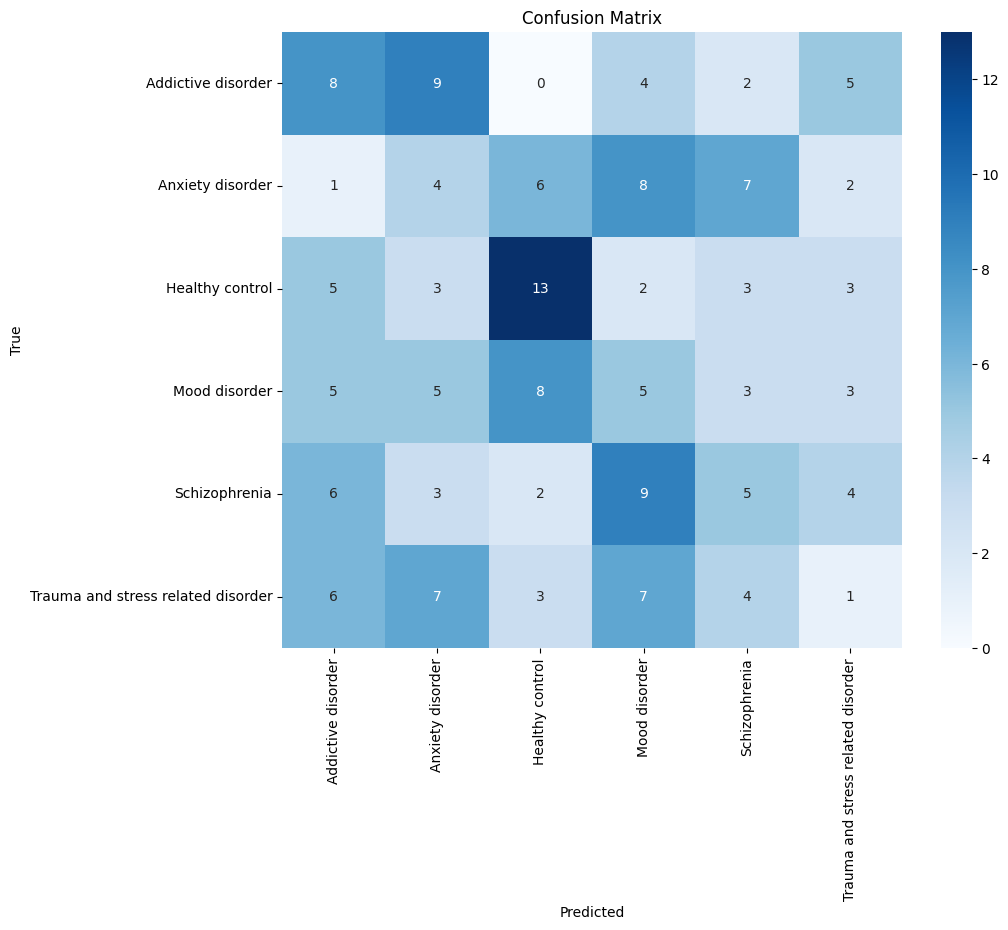

In [186]:
# Preprocess the data for SVM
# Drop non-numeric columns, divide into features (X: eeg columns, both absolute power and functional connectivity) and target (y: main.disorder)
data = df.drop(['main.disorder', 'no.'], axis=1)
X = data
y = df['main.disorder']

# Split the data into training and testing sets with stratification to maintain label proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
param_grid = {
    'C': [0.1, 1, 5, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001, 0.0001],
    'decision_function_shape': ['ovr', 'ovo']
}

# Perform grid search using 10-fold cross-validation
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Find the best parameters and the best SVM model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_
print('Validation Accuracy:', grid_search.best_score_)
print('Best hyperparameters:', best_params)
print('Best SVM model:', best_svm)

# Test best model on test set
y_pred = best_svm.predict(X_test)
accuracy = best_svm.score(X_test, y_test)
print(f"Testing Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Conclusion & Discussion

* Discussion of your results and how they address your experimental question(s).
* Discussed limitations of your analyses.
* You can also discuss future directions you'd like to pursue.

## Discussion
In the present project, we investigated whether individual with Addictive disorder, Anxiety disorder, Mood disorder, Schizophrenia, Trauma disorder, and healthy controls exhibit different brain activation as measured by resting-state EEG. In particular, we look at the absolute power of brain waves across wave bands (delta, theta, alpha, beta, highbeta, gamma) for each channel, and the functional connectivity data between pairs of channels. 

Our analysis focuses on 4 steps:
1. ### Principal Component Analysis to reduce the dimensionality of the EEG data
 PCA revealed that the first 12 components capture 70% of the original dataset's variance, hence we retained 12 orthogonal components to be used for clustering. The decision to reduce the dimensionality of the data from the original 1142 columns to 12 features is to simplify the clustering process by engineering a small set of orthogonal features. 

2. ### Clustering on PCA-reduced data
The application of K-Means and Gaussian Mixture Model on the dimensionality reduced data revealed, in both cases, low separability of the various cluster (hence no clear separation between mental disorders). This is indicated by the metrics used to assess cluster quality. 
  
    For K-Means:   

        - ARI: 0.01  
        - NMI: 0.02  
        - AMI: 0.01  
    For GMM:  
    
        - ARI: 0.00  
        - NMI: 0.01  
        - AMI: 0.00  
        
3. ### Clustering on non-reduced data
Given the poor results of clustering on the dimensionality-reduced data, K-Means and GMM were applied on the full EEG data as well. Although the clustering was more successful than on the PCA-reduced data, the results indicate no clear difference between the resting-state EEG activity between the various categories of mental disorders. In both cases (K-means and GMM) the metrics are as follows:

        - ARI: 0.00
        - NMI: 0.02  
        - AMI: 0.00

4. ### Supervised learning classification
 Lastly, we explored the predictive power of the resting-state EEG data trough a Support Vector Classifier. After hyperparameter tuning, the best model parameters included a radial basis function kernel and a regularization parameter $\beta = 1/10$. Although the model shows above-chance accuracy in 10-fold cross validation (accuracy = $0.28$), the performance on the test set decreases considerably, with f1 scores as low as $0.06$. This indicate that the EEG data in question is not suitable for discerning mental health conditions.

In general, our results lead us to fail to reject our null hypothesis: patients with Addictive disorder, Anxiety disorder, Mood disorder, Schizophrenia, Trauma disorder, and healthy controls can no be discerned based on their resting-state EEG (both Absolute Power and functional connectivity) whether through unsupervised clustering or supervised classification. 

## Limitations and Future Directions

### 1. Low Spatial Resolution of EEG
Being EEG a non-invasive technique the spatial resolution is not optimal, with channels recording from thousands of neurons at a time. This could lead to differences in brain activity not captured by this type of data. 

- future development:
Perform a similar analysis on higher-resolution data such as MRI or MEG to extract more detail information on brain activity in mental disorder groups. 

### 2. Resting State EEG data
Resting State EEG might not be informative enough on the different brain activation of patients. Perhaps task data could capture difference in brain waves related to specific conditions that resting-state data can not capture due to its nature. 

- future development:
Attempt the same analysis on task EEG data, including emotional tasks and memory tasks such as n-back. This could reveal task-related brain activity differences in the 5 mental disorder groups. 

### 3. Class Imbalance
Our dataset included an uneven number of subjects in each class, ranging from 266 Mood disorder patients to 46 OCD patients. To balance the classes, we decided to exclude the OCD category and take a random sample of $n = 95$ in the remaining classes. The smaller sample could potentially bias the analysis, especially for supervised classification.

- future development: Harness synthetic upsampling to avoid reducing the dataset size while still working on a balanced dataset. One possible technique to explore is SMOTE (synthetic minority upsampling technique), which uses interpolation to create new data points.

### 4. Limited choice of algorithms
For this analysis, we focused on K-Means and Gaussian Mixture Model for clustering, and Support Vector Machine for classification. The high dimensionality of the data might be suitable for more complex analysis techniques, especially for classification. 

- future development: Explore more powerful and complex algorithms such as Random Forest, Multi-Layer Perceptron, or K-Nearest-Neighbors for classification of patients into the 5 diagnostic groups considered. 


## Discussion

In the present project, we investigated whether individuals with Addictive disorder, Anxiety disorder, Mood disorder, Schizophrenia, Trauma disorder, and healthy controls exhibit different brain activation as measured by resting-state EEG. In particular, we examined the absolute power of brain waves across wave bands (delta, theta, alpha, beta, high beta, gamma) for each channel and the functional connectivity data between pairs of channels.

Our analysis focused on four main steps:

1. **Principal Component Analysis (PCA):**
    - PCA revealed that the first 12 components capture 70% of the original dataset's variance. We retained these 12 orthogonal components for clustering, reducing the dimensionality from 1142 columns to 12 features. This simplification aimed to facilitate the clustering process by engineering a smaller set of orthogonal features.

2. **Clustering on PCA-Reduced Data:**
    - Applying K-Means and Gaussian Mixture Model (GMM) to the PCA-reduced data showed low separability of clusters, indicating no clear distinction between the mental disorders. This was reflected in the clustering metrics:
        - **K-Means:**
            - ARI: 0.01
            - NMI: 0.02
            - AMI: 0.01
        - **GMM:**
            - ARI: 0.00
            - NMI: 0.01
            - AMI: 0.00

3. **Clustering on Non-Reduced Data:**
    - Given the poor clustering results on PCA-reduced data, we applied K-Means and GMM to the full EEG dataset. The results showed slightly better clustering but still indicated no clear differences in resting-state EEG activity between the various categories of mental disorders:
        - **K-Means:**
            - ARI: 0.06
            - NMI: 0.10
            - AMI: 0.09
        - **GMM:**
            - ARI: 0.06
            - NMI: 0.10
            - AMI: 0.09

4. **Supervised Learning Classification:**
    - We explored the predictive power of the resting-state EEG data using a Support Vector Classifier (SVC). After hyperparameter tuning, the best model parameters included a radial basis function kernel and a regularization parameter \( C = 0.1 \). Although the model showed above-chance accuracy in 10-fold cross-validation (accuracy = 0.28), the performance on the test set was considerably lower, with F1 scores as low as 0.06. This indicates that the EEG data in question is not suitable for distinguishing mental health conditions.

### Conclusion

Our results lead us to fail to reject our null hypothesis: patients with Addictive disorder, Anxiety disorder, Mood disorder, Schizophrenia, Trauma disorder, and healthy controls cannot be discerned based on their resting-state EEG (both absolute power and functional connectivity) through unsupervised clustering or supervised classification.

### Limitations and Future Directions

1. **Low Spatial Resolution of EEG:**
    - EEG is a non-invasive technique with limited spatial resolution, recording from thousands of neurons at a time. This may result in missed differences in brain activity.
    - **Future Development:** Perform similar analyses on higher-resolution data such as MRI or MEG to extract more detailed information on brain activity in mental disorder groups.

2. **Resting-State EEG Data:**
    - Resting-state EEG might not be sufficiently informative about brain activation differences. Task-based data could reveal condition-specific brain wave differences.
    - **Future Development:** Conduct similar analyses on task EEG data, including emotional and memory tasks, to capture task-related brain activity differences.

3. **Class Imbalance:**
    - Our dataset had an uneven number of subjects in each class, leading to potential biases. We excluded OCD and took random samples of 95 subjects from other classes, which might not be ideal.
    - **Future Development:** Use synthetic upsampling techniques like SMOTE to balance the dataset without reducing its size.

4. **Limited Choice of Algorithms:**
    - We focused on K-Means and GMM for clustering and SVM for classification. High-dimensional data might benefit from more complex algorithms.
    - **Future Development:** Explore more powerful algorithms like Random Forest, Multi-Layer Perceptron, or K-Nearest Neighbors for classifying patients into the diagnostic groups.